In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mai 19

@author: ChatGPT
"""

import numpy as np
import matplotlib.pyplot as plt

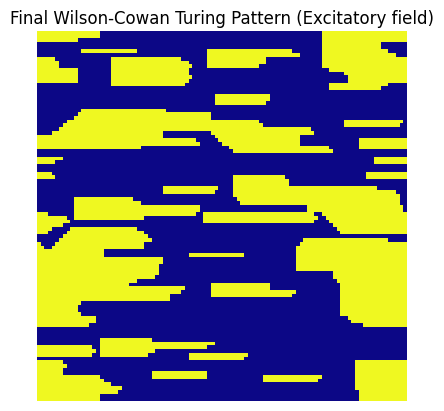

In [ ]:
# Parameters
size = 100  # grid size
steps = 5000
dt = 0.1

# Weight parameters (tuned for instability)
w_EE = 12.0
w_EI = 10.0
w_IE = 10.0
w_II = 0.0

# Diffusion rates (key: inhibitory diffuses much faster)
D_E = 0.01  # excitatory diffusion (short-range)
D_I = 0.9   # inhibitory diffusion (long-range)

# External input
P = 0.5
Q = 0.0

# Sigmoid function
def S(x):
    return 1 / (1 + np.exp(-x))

# Laplacian
def laplacian(Z):
    return (
        -4 * Z
        + np.roll(Z, (0, -1), (0, 1))
        + np.roll(Z, (0, 1), (0, 1))
        + np.roll(Z, (-1, 0), (0, 1))
        + np.roll(Z, (1, 0), (0, 1))
    )

# Initialize E and I with small random noise
E = 0.1 * np.random.rand(size, size)
I = 0.1 * np.random.rand(size, size)

# Main loop
for i in range(steps):
    lap_E = laplacian(E)
    lap_I = laplacian(I)
    
    dE = -E + S(w_EE * E - w_EI * I + 0.5) + D_E * lap_E
    dI = -I + S(w_IE * E - w_II * I + Q) + D_I * lap_I
    
    E += dt * dE
    I += dt * dI

    # # Optional: plot every 1000 steps
    # if i % 1000 == 0:
    #     plt.imshow(E, cmap='plasma')
    #     plt.title(f"Excitatory Activity (Step {i})")
    #     plt.axis('off')
    #     plt.show()

# Final pattern
plt.imshow(I, cmap='plasma')
plt.title("Final Wilson-Cowan Turing Pattern (Excitatory field)")
plt.axis('off')
plt.show()
